## Tutorial

Welcome to `ktplotspy`! This is a python library to help visualise `CellPhoneDB` results, ported from the original [ktplots R package](https://www.github.com/zktuong/ktplots) (which still has several other visualisation options). Here, we will go through a quick tutorial on how to use the functions in this package.

**Import libraries**

In [1]:
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt

from pathlib import Path

**Prepare input**

We will need 3 files to use this package, the h5ad file used for `CellPhoneDB`,the `means.txt`, `pvalues.txt`. `deconvoluted.txt` is only used for `plot_cpdb_chord`.

In [2]:
# read in the files
# 1) .h5ad file used for performing CellPhoneDB
DATADIR = Path("../../data/")

adata = ad.read_h5ad(DATADIR / "kidneyimmune.h5ad")

# 2) output from CellPhoneDB
means = pd.read_csv(DATADIR / "out" / "means.txt", sep="\t")
pvals = pd.read_csv(DATADIR / "out" / "pvalues.txt", sep="\t")
decon = pd.read_csv(DATADIR / "out" / "deconvoluted.txt", sep="\t")

### Heatmap

The original heatmap plot from `CellPhoneDB` can be achieved with this reimplemented function.

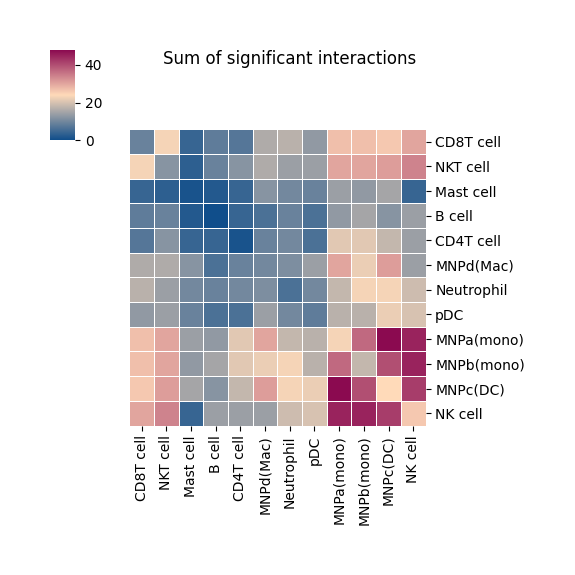

In [3]:
kpy.plot_cpdb_heatmap(pvals=pvals, figsize=(5, 5), title="Sum of significant interactions")

You can also specify specific celltypes to plot.

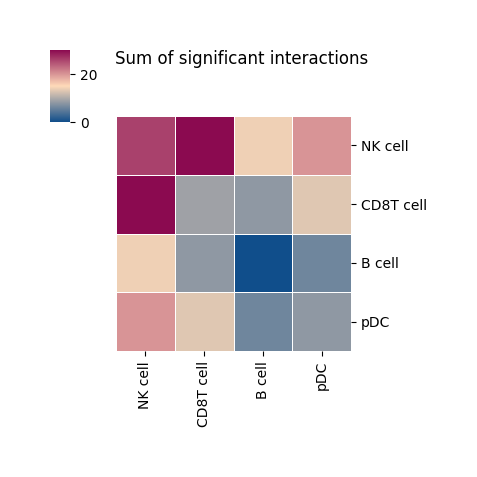

In [4]:
kpy.plot_cpdb_heatmap(
    pvals=pvals, cell_types=["NK cell", "pDC", "B cell", "CD8T cell"], figsize=(4, 4), title="Sum of significant interactions"
)

The current heatmap is directional (check `count_network` and `interaction_edges` for more details in `return_tables = True`).

To obtain the heatmap where the interaction counts are not symmetrical, do:

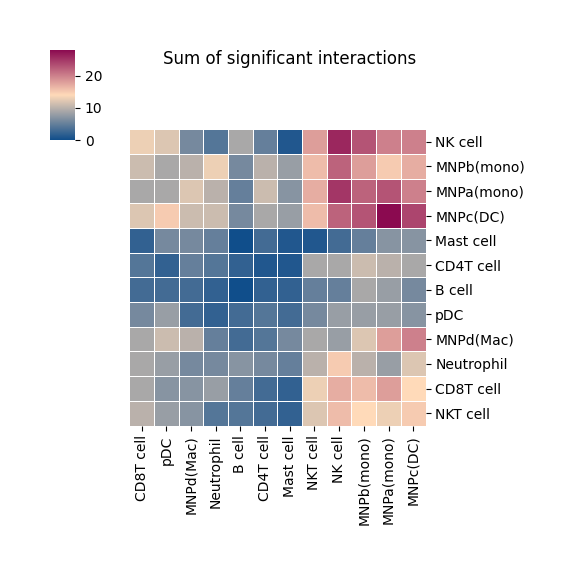

In [5]:
kpy.plot_cpdb_heatmap(
    pvals=pvals,
    figsize=(5, 5),
    title="Sum of significant interactions",
    symmetrical=False,
)

The values for the `symmetrical=False` mode follow the direction of the L-R direction where it's always moleculeA:celltypeA -> moleculeB:celltypeB.

Therefore, if you trace on the `x-axis` for `celltype A` [MNPa(mono)] to `celltype B` [CD8T cell] on the `y-axis`:

A -> B is 18 interactions

Whereas if you trace on the `y-axis` for `celltype A` [MNPa(mono)] to `celltype B` [CD8T cell] on the `x-axis`:

A -> B is 9 interactions

`symmetrical=True` mode will return 18+9 = 27

### Dot plot

A simple usage of `plot_cpdb` is like as follows:

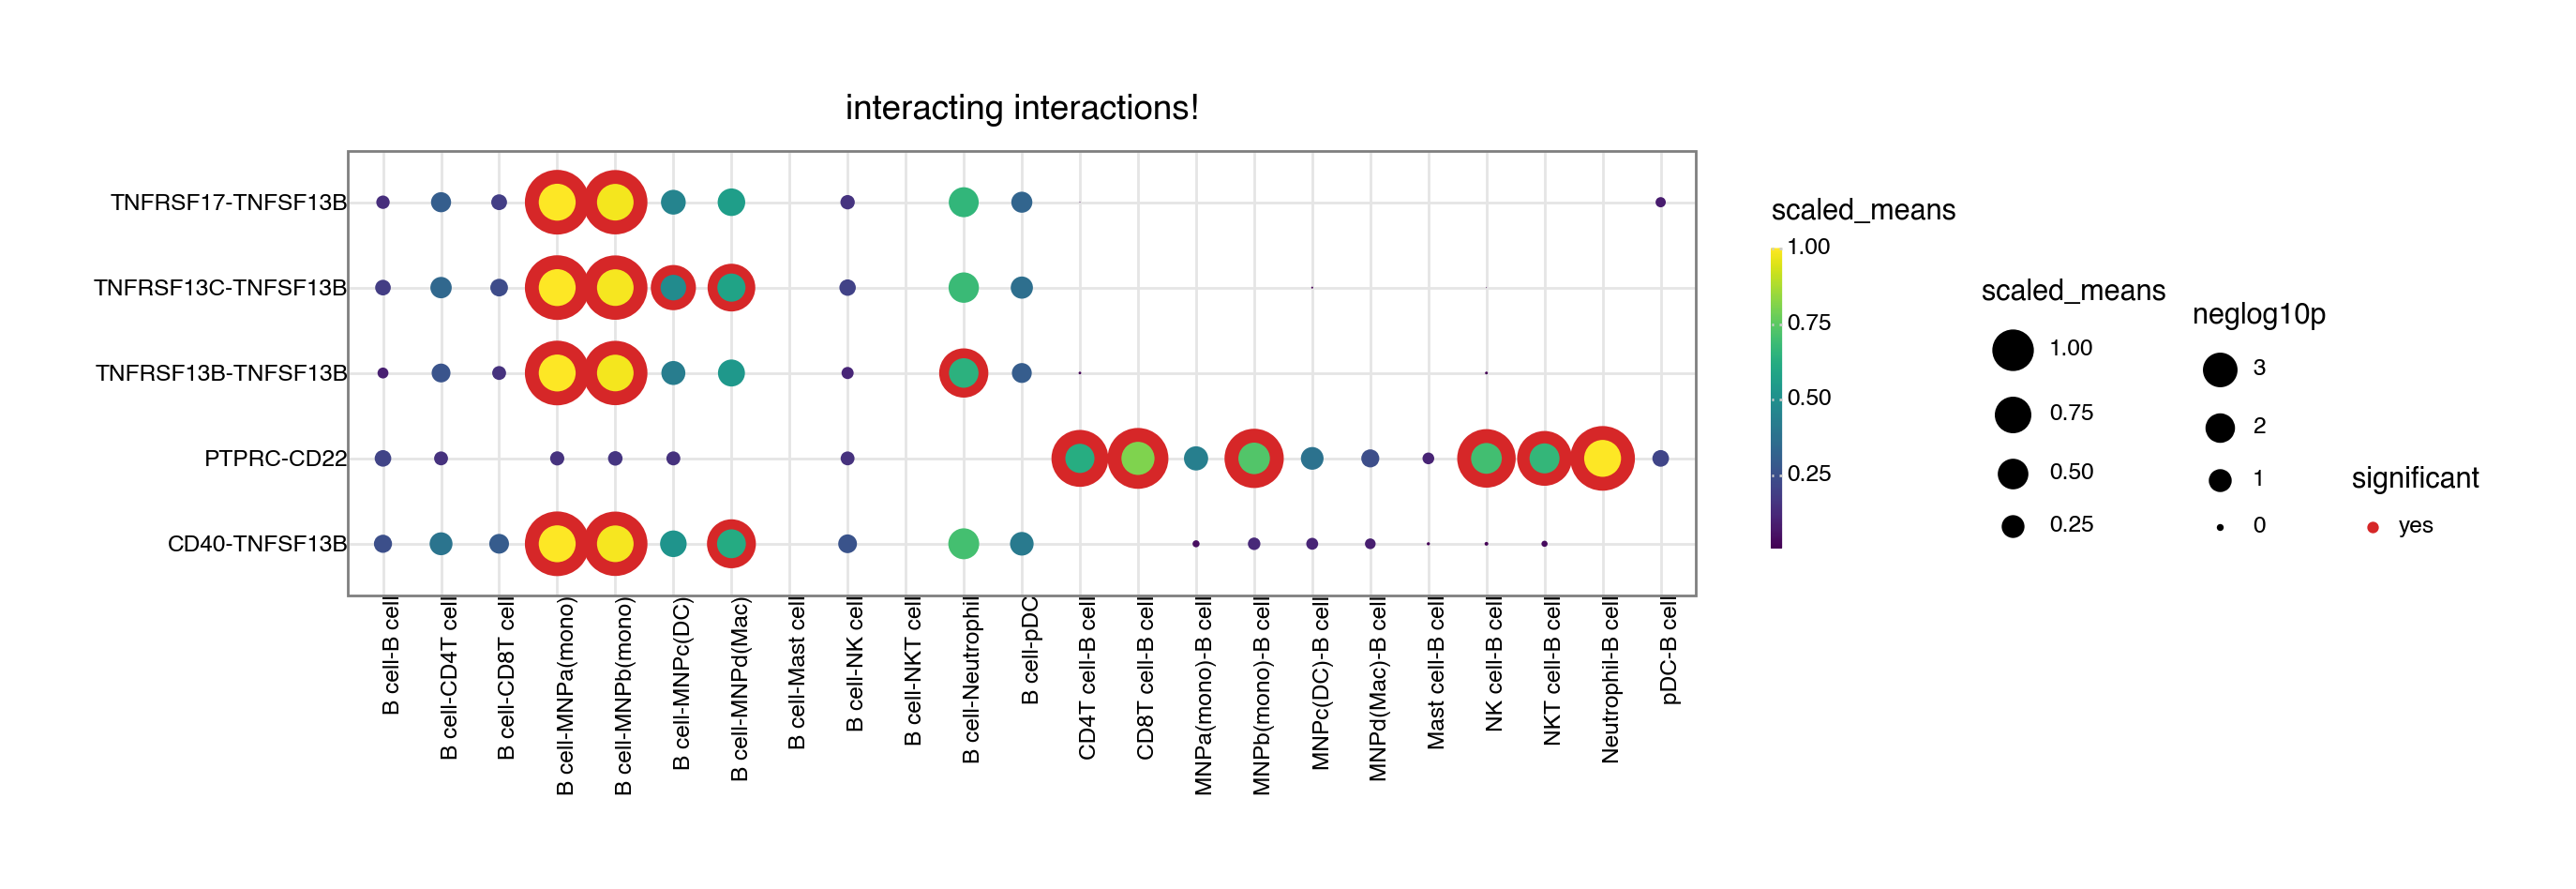

In [6]:
# TODO: How to specify the default plot resolution??
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=["PTPRC", "TNFSF13B"],
    figsize=(13, 4),
    title="interacting interactions!",
)

You can toggle `keep_id_cp_interaction` to keep the original interaction id. This is useful when there are duplicate interaction names (from cellphonedb V5 onwards).

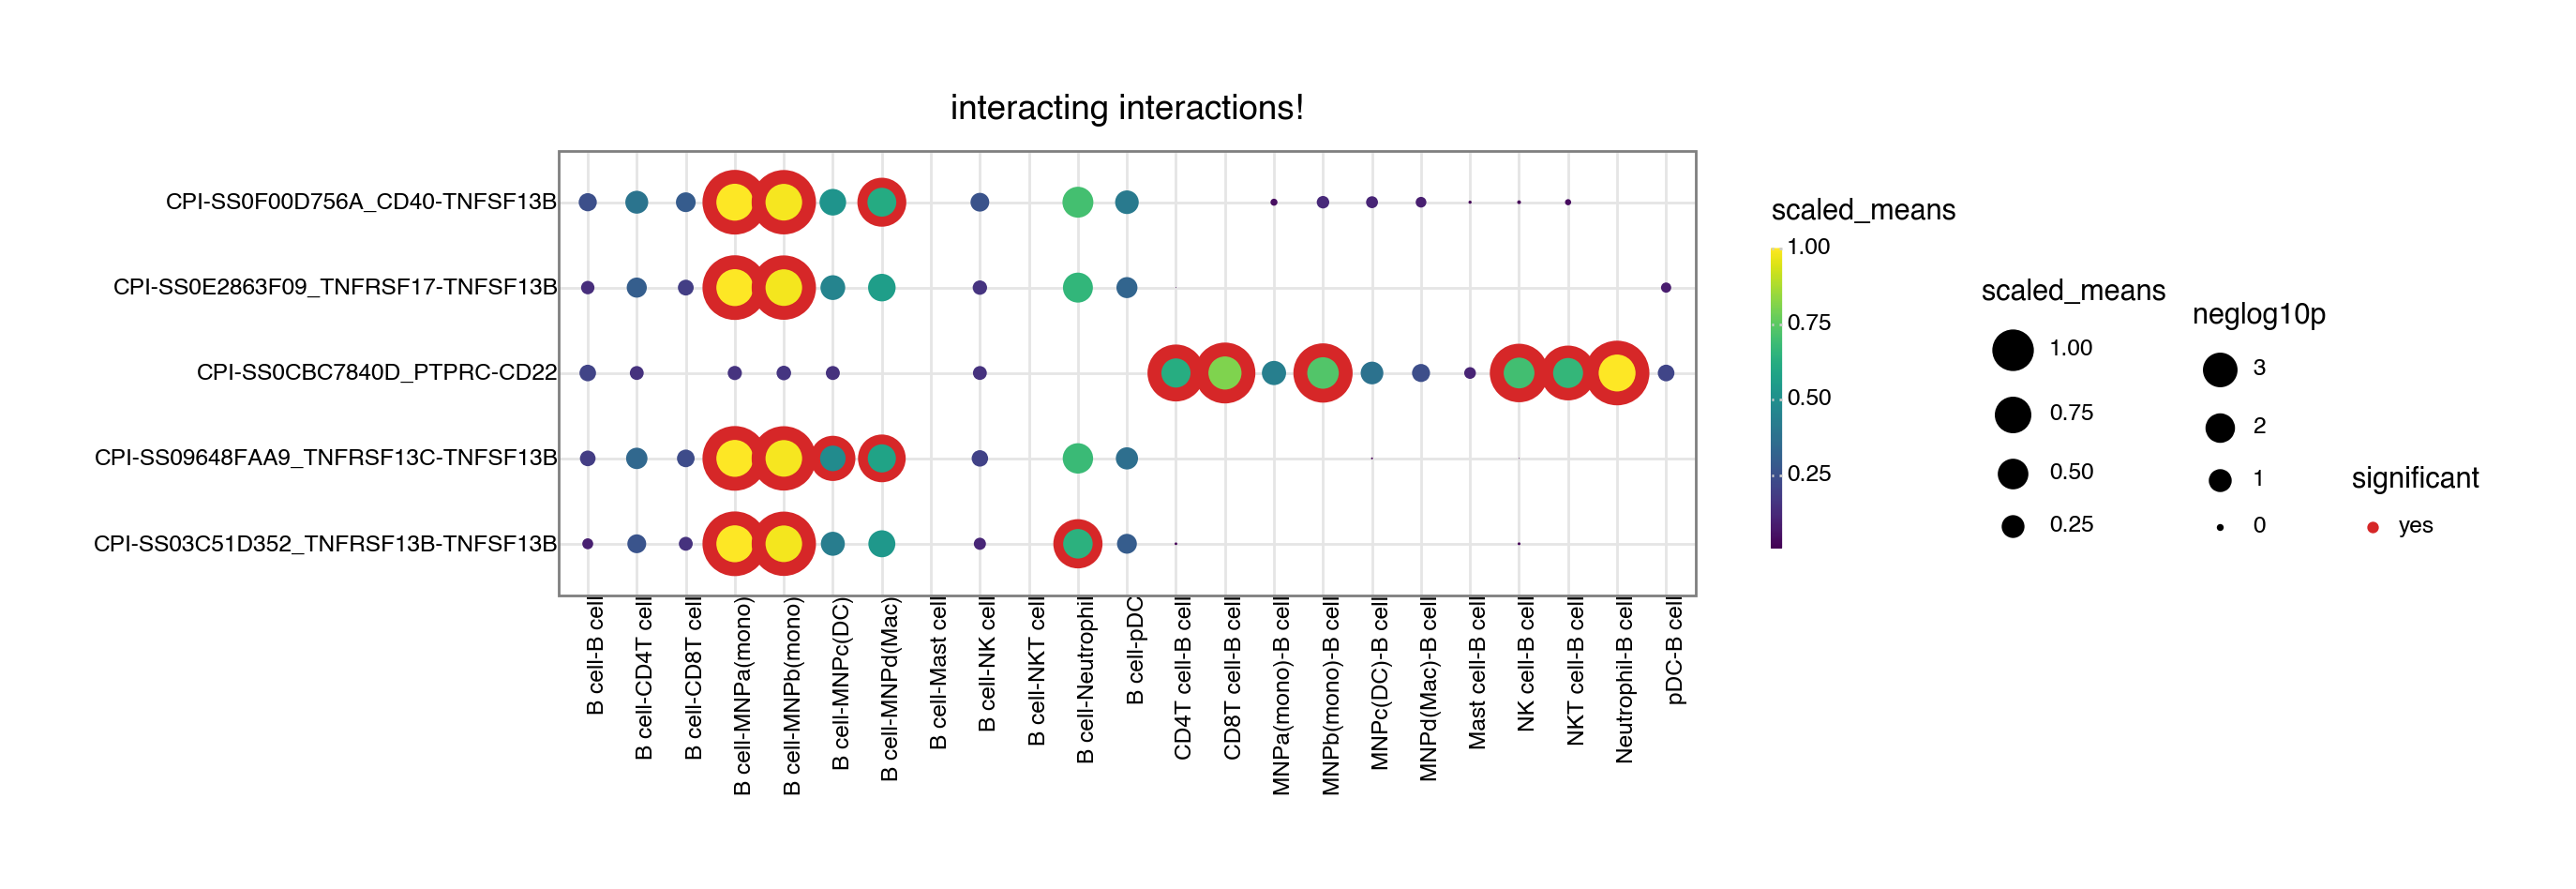

In [7]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=["PTPRC", "TNFSF13B"],
    figsize=(13, 4),
    title="interacting interactions!",
    keep_id_cp_interaction=True,
)

You can also specify a `gene_family`.

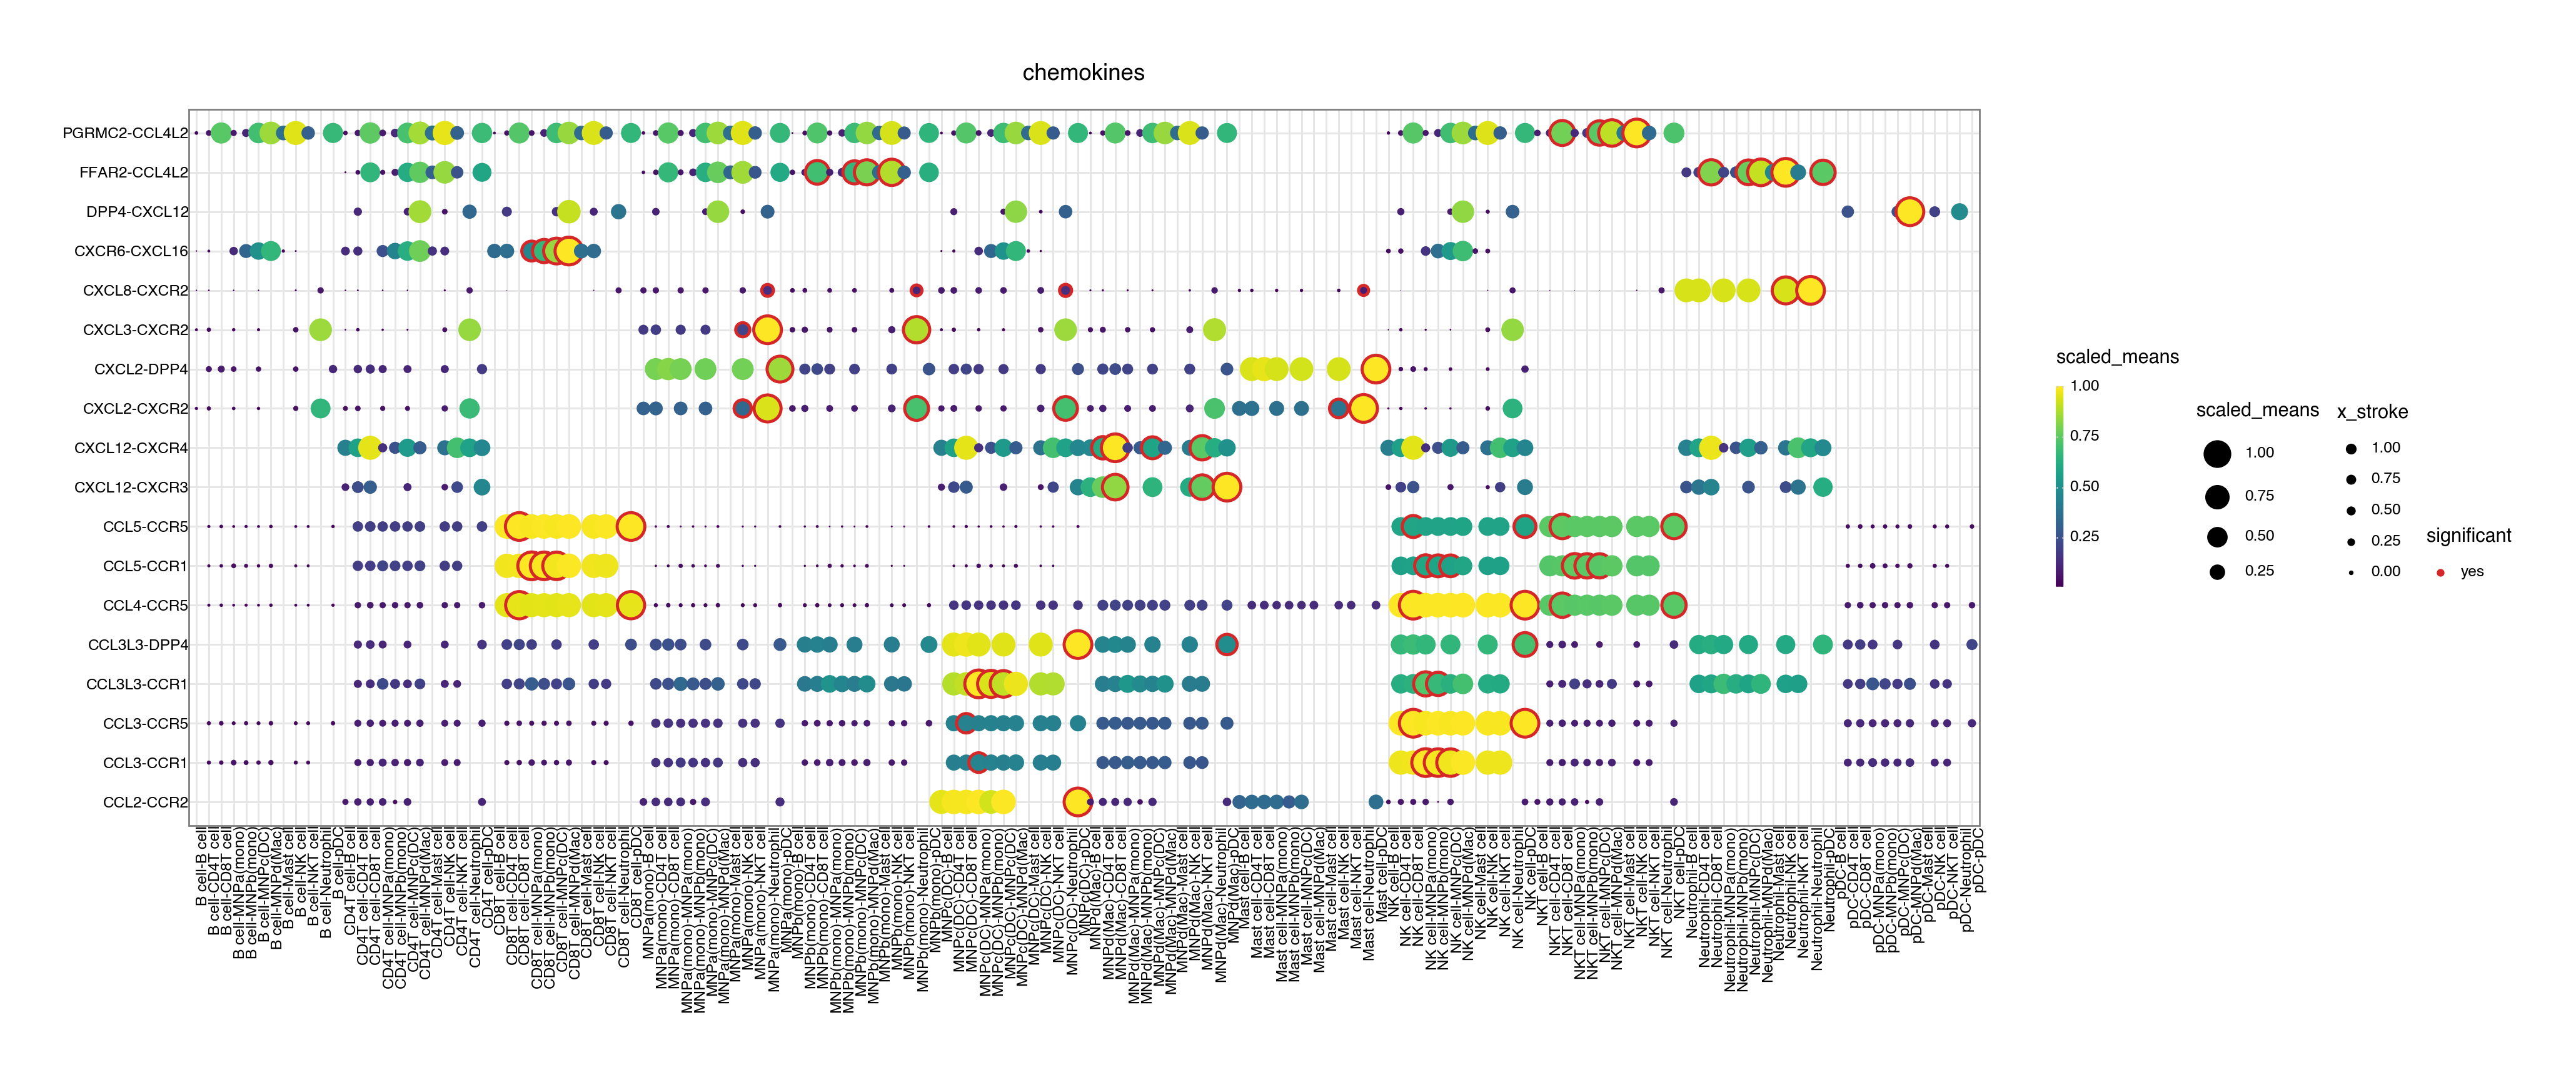

In [8]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1=".",
    cell_type2=".",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    gene_family="chemokines",
    highlight_size=1,
    figsize=(20, 8),
)

Or don't specify either and it will try to plot all significant interactions.

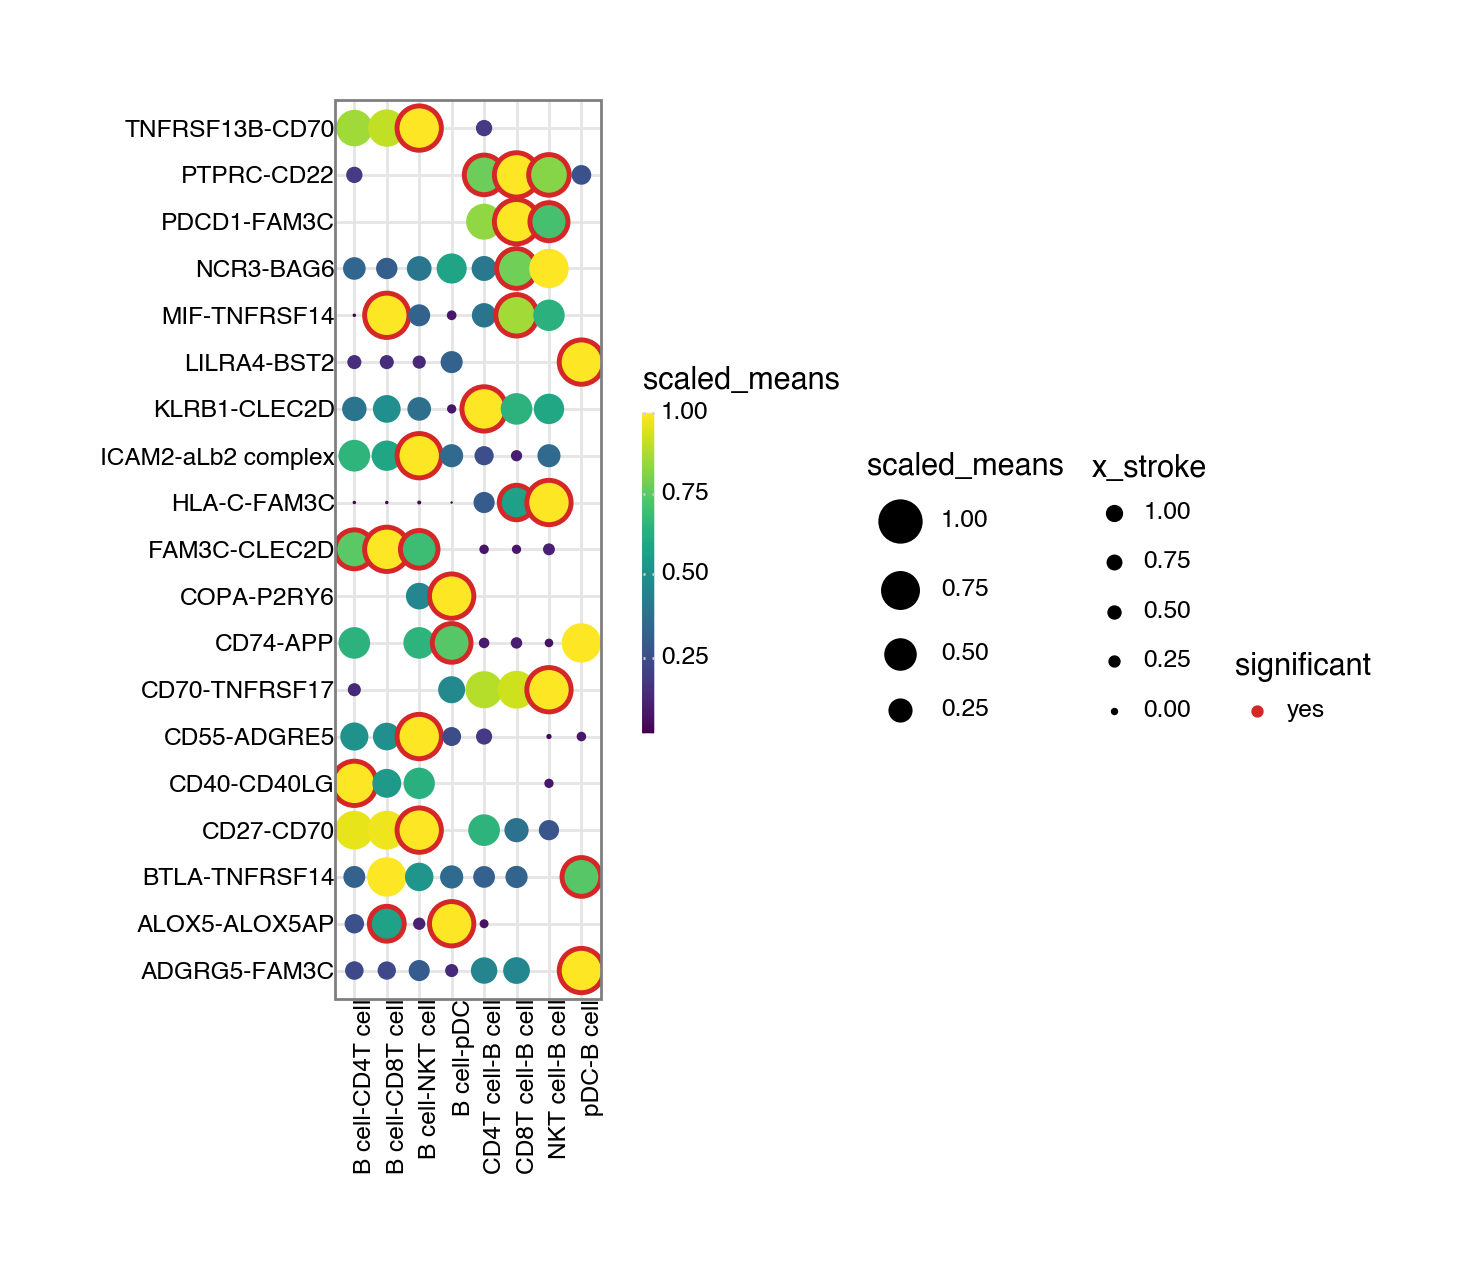

In [9]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2="pDC|T",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    highlight_size=1,
    figsize=(6.5, 5.5),
)

If you prefer, you can also use the `squidpy` inspired plotting style:

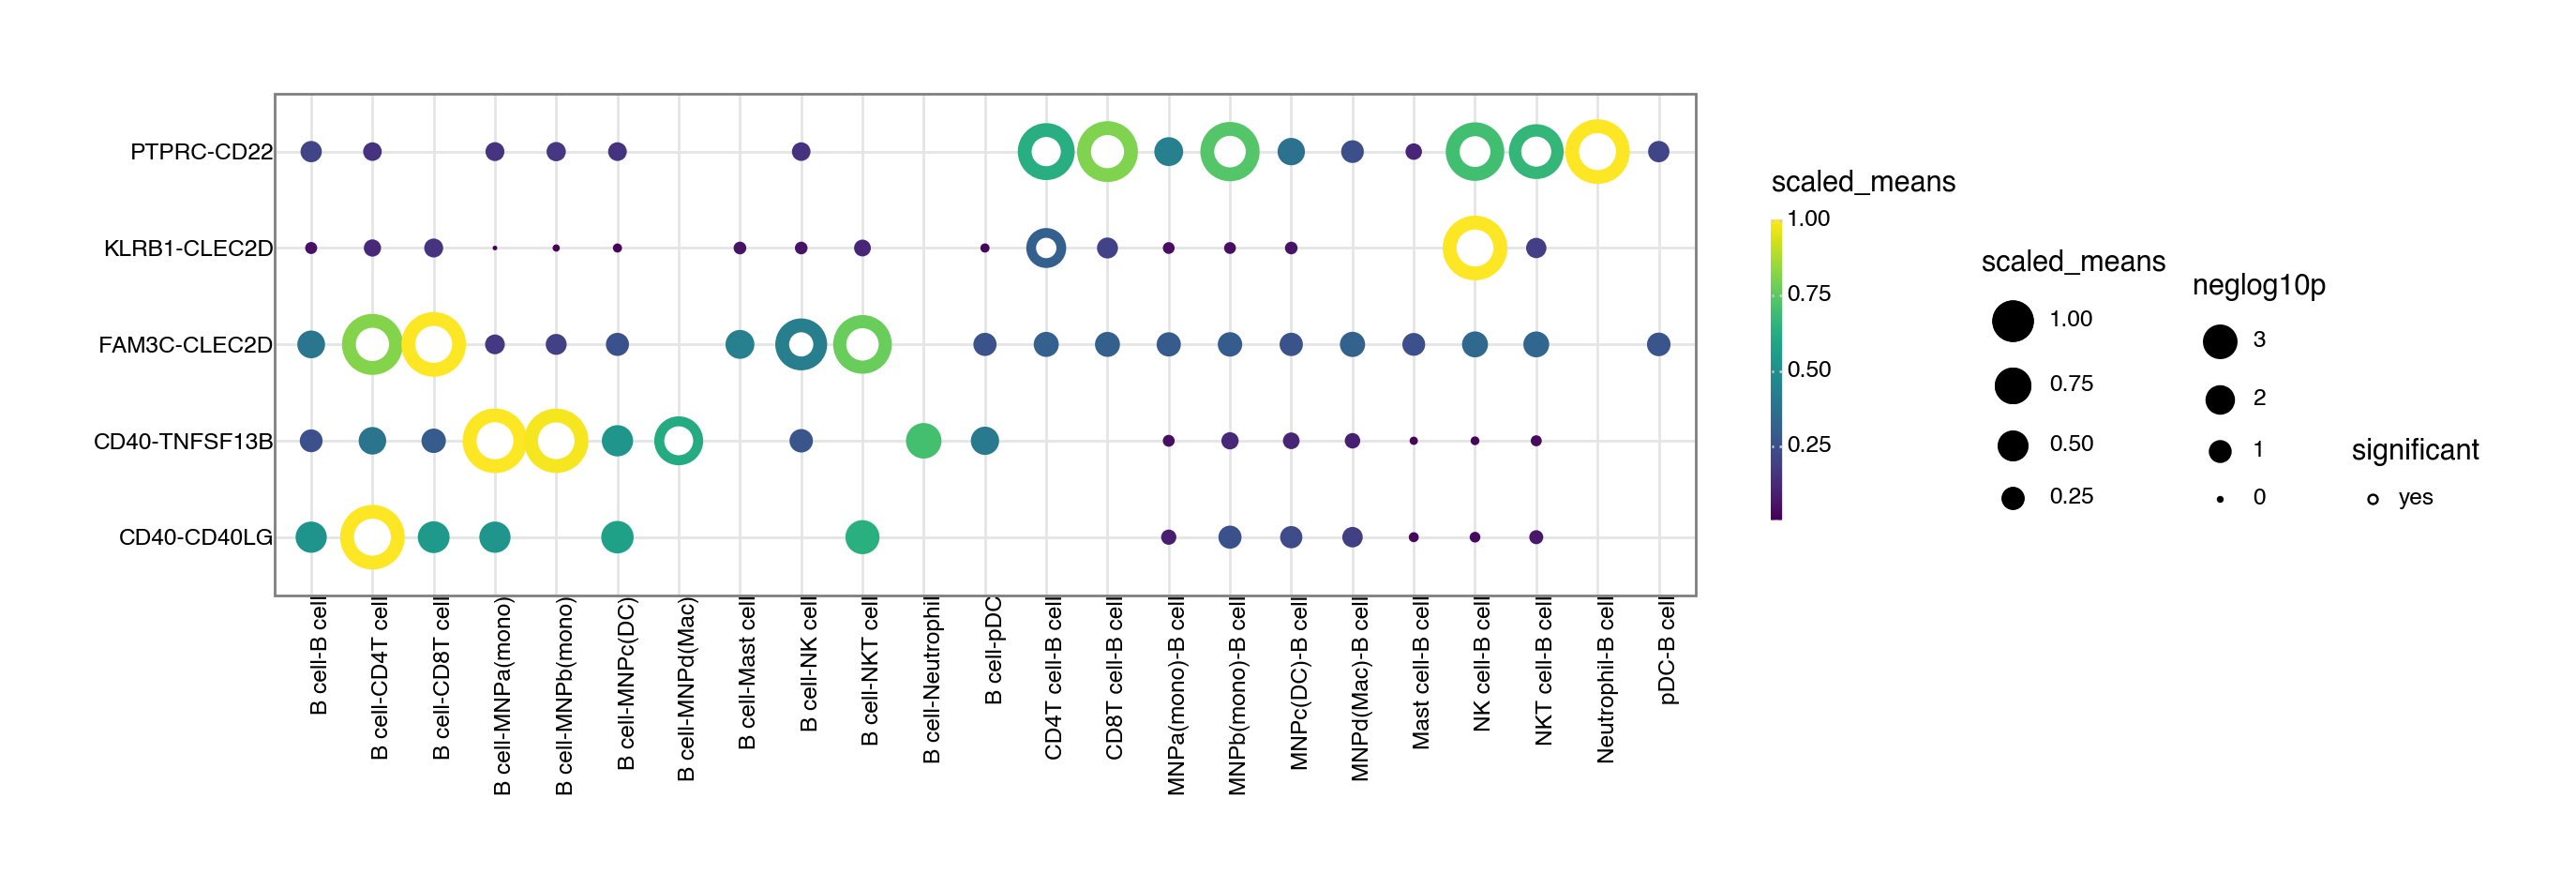

In [10]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=["PTPRC", "CD40", "CLEC2D"],
    default_style=False,
    figsize=(13, 4),
)

### Chord diagram

There is a re-implementation of a circos/chord diagram by leveraging on the `pyCirclize` package.

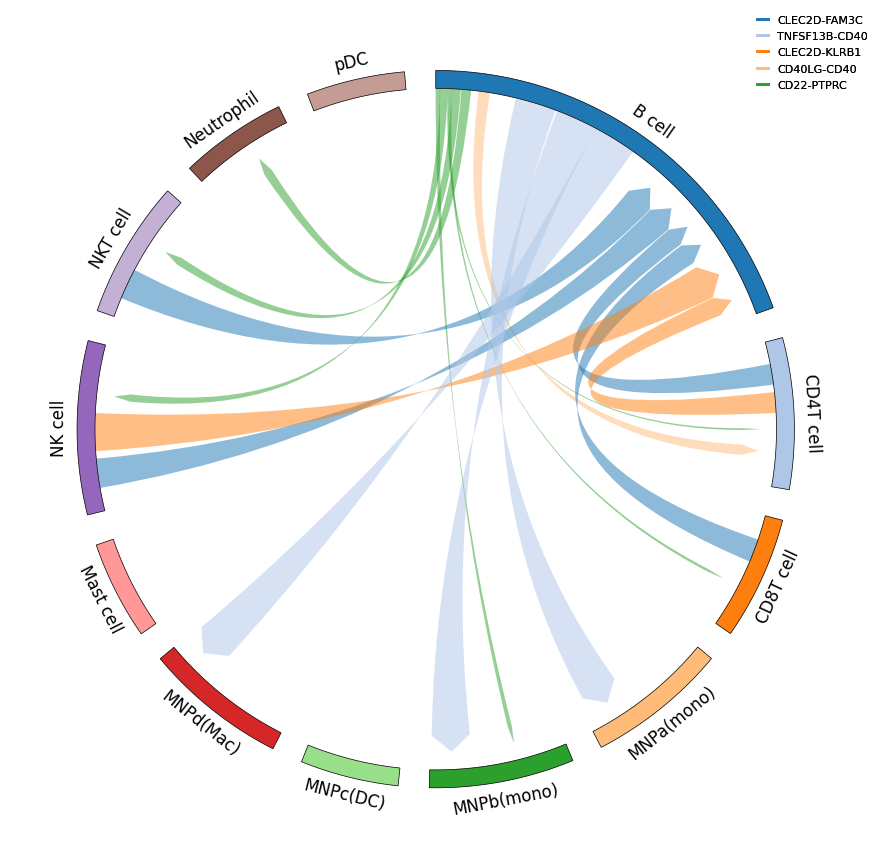

In [11]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    interaction=["PTPRC", "CD40", "CLEC2D"],
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 95, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
    link_offset=1,
)

Colour of links can be made to be the same as the celltype.

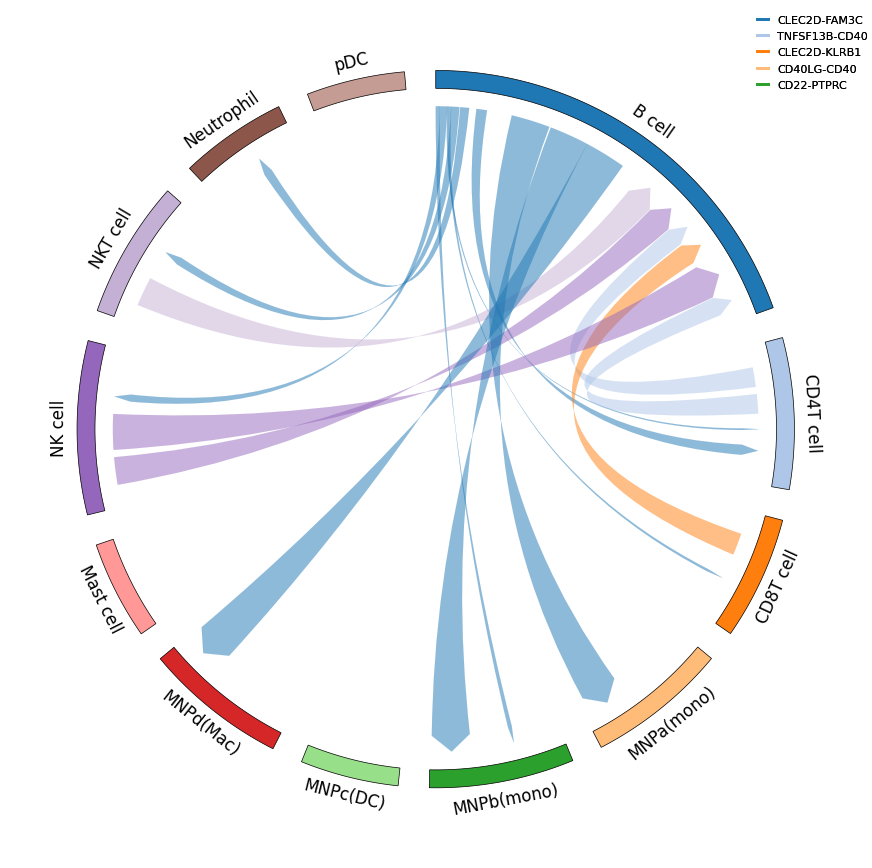

In [12]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    interaction=["PTPRC", "CD40", "CLEC2D"],
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 90, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
    link_offset=1,
    same_producer_colors=True,
)

If your `adata` already has e.g. `adata.uns['celltype_colors']`, it will retrieve the `sector_colours` correctly:

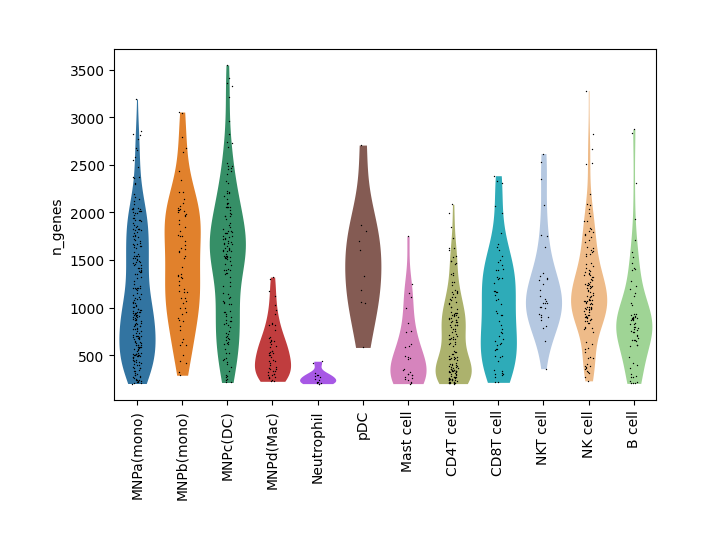

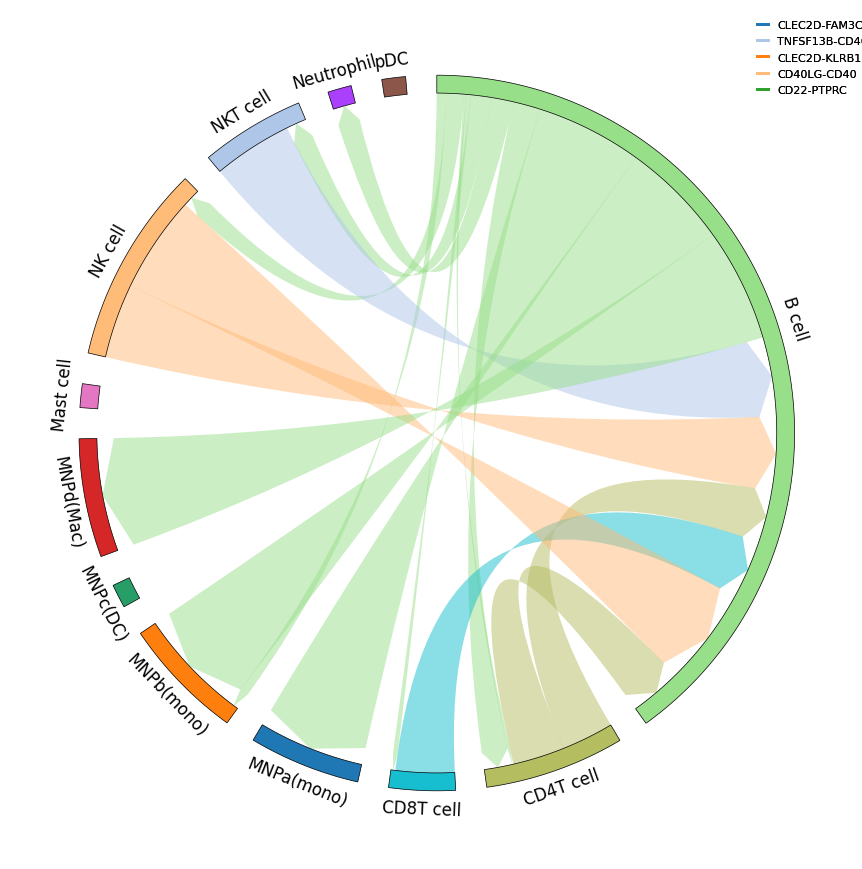

In [13]:
import scanpy as sc

sc.pl.violin(adata, ["n_genes"], groupby="celltype", rotation=90)
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    interaction=["PTPRC", "CD40", "CLEC2D"],
    same_producer_colors=True,
    link_kwargs={"direction": 1, "allow_twist": True},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
)

You can also provide dictionaries to change the colours for both `sectors` and `links`.

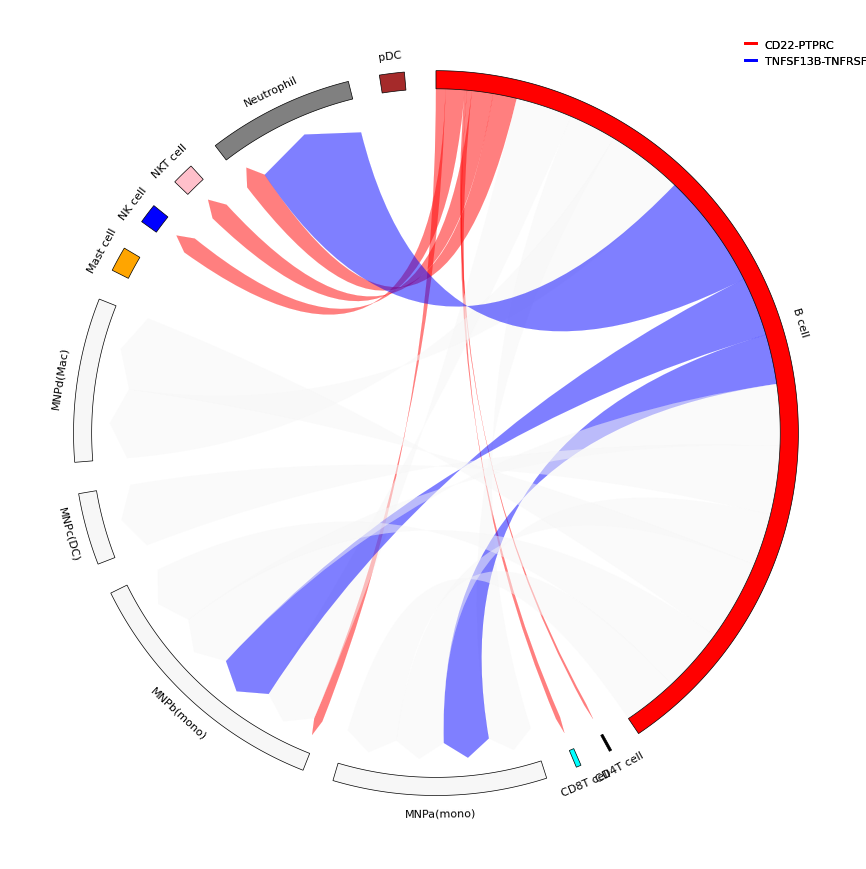

In [14]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    interaction=["PTPRC", "TNFSF13B", "BMPR2"],
    sector_colors={
        "B cell": "red",
        "NK cell": "blue",
        "CD4T cell": "black",
        "pDC": "brown",
        "Neutrophil": "grey",
        "Mast cell": "orange",
        "NKT cell": "pink",
        "CD8T cell": "cyan",
    },
    link_colors={"CD22-PTPRC": "red", "TNFSF13B-TNFRSF13B": "blue"},
)

You can also just plot a specific interaction:

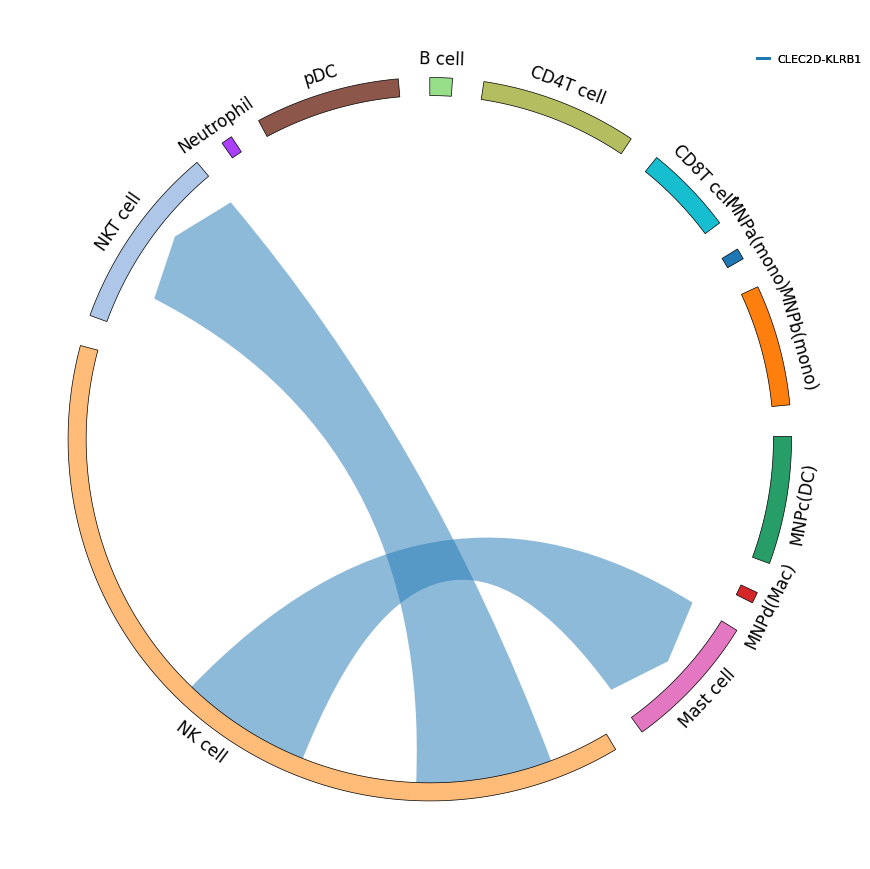

In [15]:
kpy.plot_cpdb_chord(
    adata=adata,
    interaction="CLEC2D-KLRB1",
    keep_celltypes=["NKT cell", "Mast cell", "NK cell"],
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    link_kwargs={"direction": 1, "allow_twist": False, "r1": 95, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
)

You can also fix the sector size to be equal, although this will cause the links to be squished.

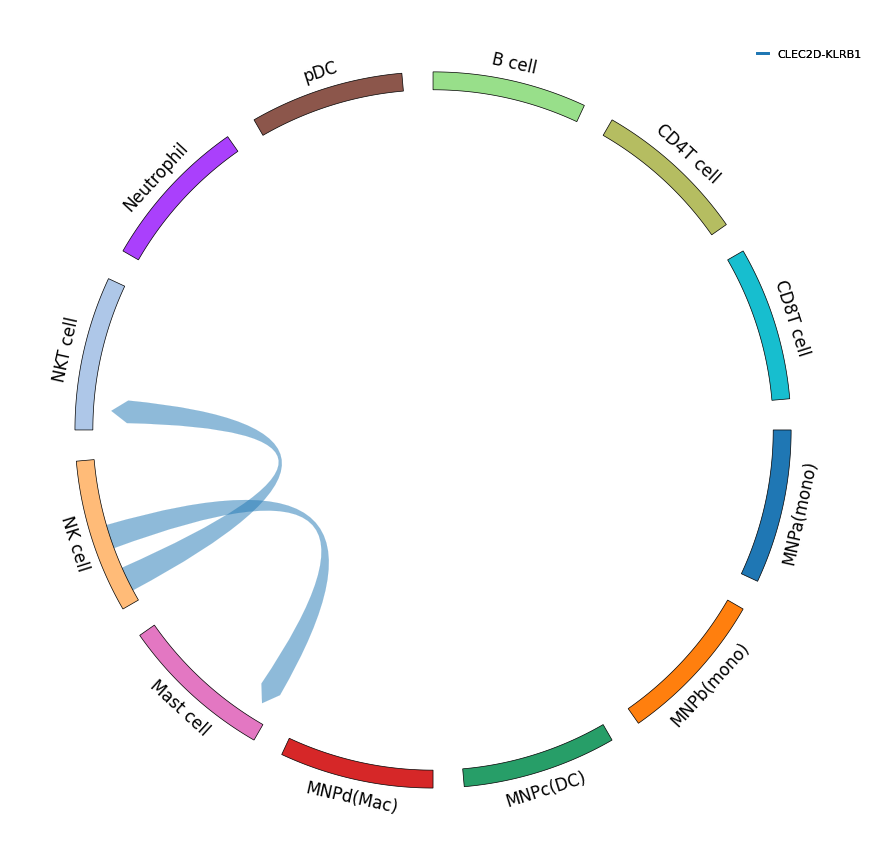

In [16]:
kpy.plot_cpdb_chord(
    adata=adata,
    interaction="CLEC2D-KLRB1",
    keep_celltypes=["NKT cell", "Mast cell", "NK cell"],
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    link_kwargs={"direction": 1, "allow_twist": False, "r1": 95, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
    equal_sector_size=True,
)

## Saving the plots

For `plot_cpdb`, because it's written with `plotnine`, you need to save it as follows:

```python
p = plot_cpdb(...)
p.save(...)
```
see also:
https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html

For `plot_cpdb_chord`, you can save it as follows:

```python
p = plot_cpdb_chord(...)
p.savefig(...)
```
see also:
https://moshi4.github.io/pyCirclize/api-docs/circos/#pycirclize.circos.Circos.savefig

For other functions, you can use seaborn/matplotlib saving conventions e.g. `plt.savefig`

That's it for now! Please check out the original [ktplots R package](https://www.github.com/zktuong/ktplots) if you are after other kinds of visualisations.